# PlotMS in a Notebook

Original Author: drs@nrao.edu



## Description

X11 is a client/server windowing system. The client communicates with the server using the X Window System Core Protocol. This architecture allows the X11 server to accept drawing commands from a remote client and render the GUI drawing commands on the hardware which the server controls/uses, e.g. monitor, keyboard and mouse. The X11 server renders the drawing commands onto a frame buffer. This buffer allows for caching drawing results. At the appropriate time, the buffer contents are flushed video RAM.

This architecture allowed for the implementation of a virtual Frame Buffer and an accompanying virtual server. This allows X11 applications to run without actual display hardware. This is the only way to use X11 (including Qt) applications in the context of a Jupyter notebook. There is no other way.

If someone implemented an X11 server designed for use with Jupyter notebooks, the display of X11 applications within the notebook may be possible. This potential server would behave like XQuartz (the X11 server implementation for MacOS which renders X11 widgets using the native GUI environment on MacOS).

This notebook shows how virtual frame buffers can be used to run X11 applications within a Jupyter notebook. The application used is casaplotms, a Qt application.

The first step is to perform som configuration steps:

In [1]:
# Installation
import os
print("performing setup (tasks a few minutes)...")
os.system('apt-get install xvfb')
os.system('pip install casaplotms')
os.system('pip install casadata')
os.system('pip install pyvirtualdisplay')
print('complete')

performing setup (tasks a few minutes)...
complete


## Setup Virtual Frame Buffer
The pyvirtualdisplay package can be used to configure and launch a virtual frame buffer server. However, the way new processes are directed to the new frame buffer server is via a unix shell environment variable, DISPLAY. This means that this frame buffer server will be used by all X11 processes. This makes it difficult to encapsulate this pattern.

In [2]:
from pyvirtualdisplay import Display
display = Display(visible=0,size=(2048,2048))
display.start( )

## Get Data

Somehow data must be made available...

In [3]:
print("download some data...")
os.system("wget https://bulk.cv.nrao.edu/almadata/public/working/sis14_twhya_calibrated_flagged.ms.tar")
os.system("tar -xvf sis14_twhya_calibrated_flagged.ms.tar")
print('complete')

download some data...
complete


## Plot Data

Start X11 application and plot data...

In [4]:
from casaplotms import plotms
print('making the plot...')
plotms(vis='sis14_twhya_calibrated_flagged.ms',plotfile='sis14_twhya_calibrated_flagged.jpg',showgui=False,highres=True,width=600,height=350,overwrite=True)
print('complete')

making the plot...
complete


## Display the Exported Raster Image

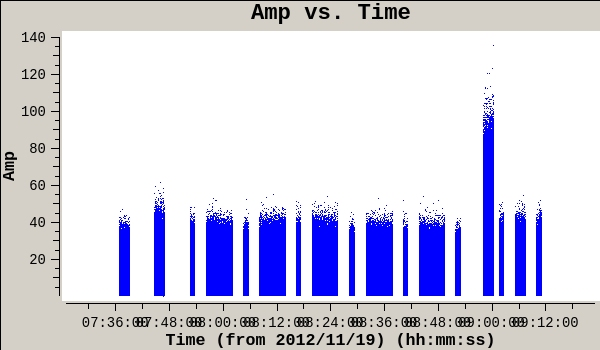

In [5]:
from IPython.display import Image
Image(filename="sis14_twhya_calibrated_flagged.jpg")